# Notebook 6 : Clustering

Notebook préparé par [Chloé-Agathe Azencott](http://cazencott.info) avec l'aide d'[Arthur Imbert](https://github.com/Henley13).

Dans ce notebook il s'agit d'explorer plusieurs techniques de clustering.

In [2]:
# charger numpy as np, matplotlib as plt
%pylab inline 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

In [4]:
import pandas as pd

## 1. Cercles imbriqués

Générons un jeu de données en deux dimensions formé de deux cercles imbriqués :

In [16]:
from sklearn import datasets

In [17]:
# nombre de points
n_samples = 1500

# set random seed
np.random.seed(37)

circles_X, circles_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

Visualisons ces données :

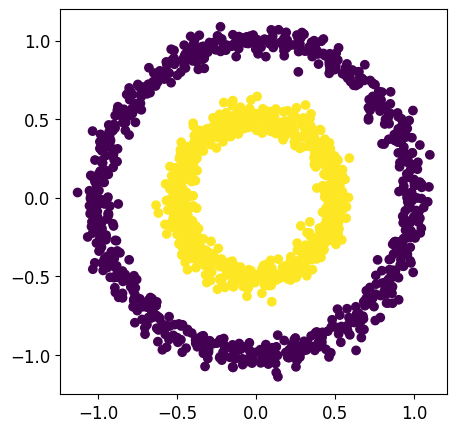

In [18]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_labels)

Supposons maintenant ne pas disposer des étiquettes. Quels algorithmes de clustering permettent de trouver deux clusters, correspondant chacun à un des cercles ?

### Algorithme des k-moyennes

L'objectif de l'algorithme k-means est retrouver $K$ clusters (et leur centroïde $\mu_k$) de manière à **minimiser la variance intra-cluster** :

\begin{align}
V = \sum_{k = 1}^{K} \sum_{x \in C_k} \frac{1}{|C_k|} (\|x - \mu_k\|^2)
\end{align}

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [19]:
from sklearn import cluster

In [20]:
# initialisation d'un k-means avec k=2
kmeans = cluster.KMeans(n_clusters=2)

# application aux données 
kmeans.fit(circles_X)

/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

L'attribut `.labels_` contient, pour chaque observation, le numéro du cluster auquel cette observation est assignée.

In [21]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Clustering K-means (K=2)')

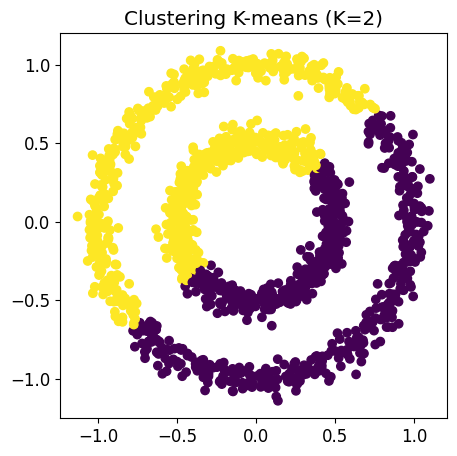

In [22]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=kmeans.labels_)
plt.title("Clustering K-means (K=2)")

#### Trouver K avec le coefficient de silhouette

Le coefficient (ou score) de silhouette permet de **comparer les distances moyennes intra- et inter-cluster** :

\begin{align}
\text{score} = \frac{b - a}{\max(a, b)}
\end{align}

avec $a$ la distance moyenne intra-cluster et $b$ la distance d'un point au cluster étranger le plus proche. Le score se calcule par observation (avec une valeur entre -1 et 1) puis la moyenne de ce score permet d'évaluer le clustering du nuage de point dans son ensemble.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [23]:
from sklearn import metrics

In [24]:
print("Coefficient de silhouette pour le k-means (k=2) : %.2f" % metrics.silhouette_score(circles_X, kmeans.labels_))

Coefficient de silhouette pour le k-means (k=2) : 0.36


In [25]:
silhouettes = []
k_values = range(2, 9)
for kval in k_values:
    kmeans_k = cluster.KMeans(n_clusters=kval)
    kmeans_k.fit(circles_X)
    silhouettes.append(metrics.silhouette_score(circles_X, kmeans_k.labels_))

/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packa

Coefficient de silhouette du KMeans en fonction de K


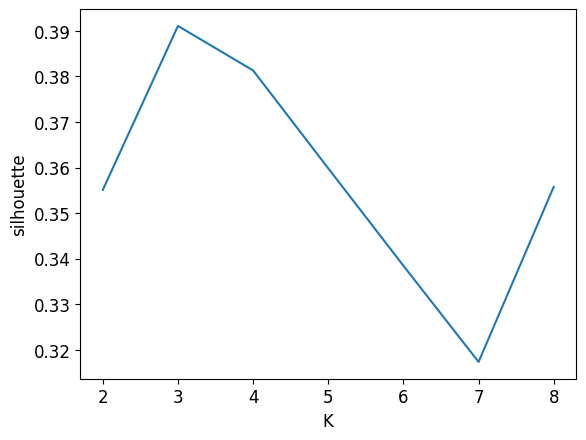

In [26]:
plt.plot(k_values, silhouettes)

plt.xlabel("K")
plt.ylabel("silhouette")

print("Coefficient de silhouette du KMeans en fonction de K")

In [27]:
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
best_K = k_values[silhouettes.index(best_silhouette)]
print("K correspondant : %.2f" % best_K)

Coefficient de silhouette optimal : 0.39
K correspondant : 3.00


/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clustering K-means (K=3)')

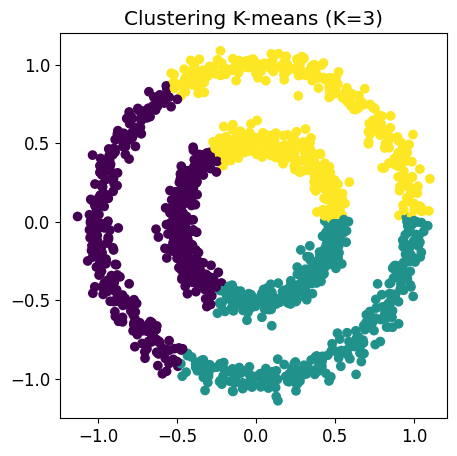

In [28]:
kmeans_k = cluster.KMeans(n_clusters=best_K)
kmeans_k.fit(circles_X)

fig = plt.figure(figsize=(5, 5))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=kmeans_k.labels_)
plt.title("Clustering K-means (K=%d)" % best_K)

### DBSCAN (Clustering par densité)

L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) fonctionne en deux temps :
- Toutes les observations suffisamment proches sont connectées entre elles.
- Les observations avec un nombre minimal de voisins connectés sont considérées comme des *core samples*, à partir desquelles les clusters sont étendues. **Toutes les observations suffisamment proche d'un *core sample* appartiennent au même cluster que celui-ci**. 

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [29]:
# initialisation d'un clustering DBSCAN
dbscan = cluster.DBSCAN(eps=0.2, min_samples=2)

# application aux données 
dbscan.fit(circles_X)

DBSCAN(eps=0.2, min_samples=2)

In [30]:
np.unique(dbscan.labels_)

array([0, 1])

L'attribut `.labels_` contient, pour chaque observation, le numéro du cluster auquel cette observation est assignée.

Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.2)')

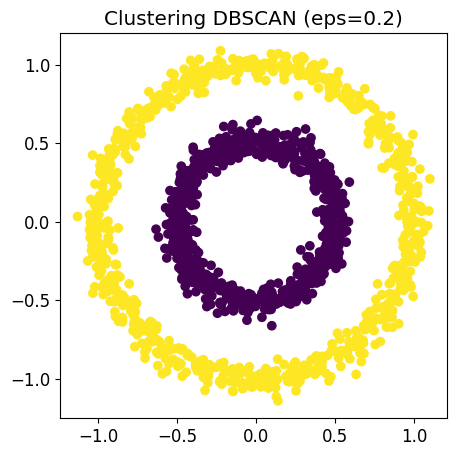

In [31]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=dbscan.labels_)
plt.title("Clustering DBSCAN (eps=0.2)")

#### Rôle du paramètre de taille de voisinage (`eps`)

Si `eps` est trop petit :

In [32]:
# initialisation d'un clustering DBSCAN
dbscan_005 = cluster.DBSCAN(eps=0.05, min_samples=2)

# application aux données 
dbscan_005.fit(circles_X)

DBSCAN(eps=0.05, min_samples=2)

In [33]:
np.unique(dbscan_005.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

L'attribut `.labels_` contient, pour chaque observation, le numéro du cluster auquel cette observation est assignée.

Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.05)')

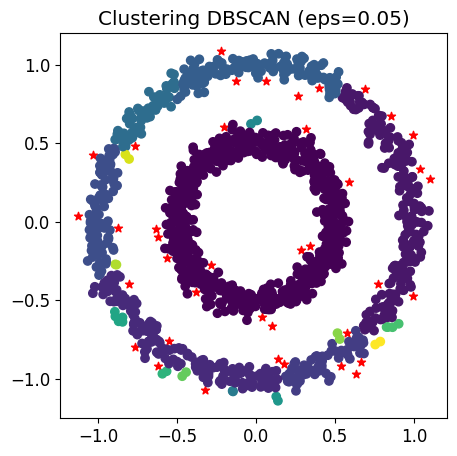

In [34]:
fig = plt.figure(figsize=(5, 5))

outliers = np.where(dbscan_005.labels_ == -1)[0]
plt.scatter(circles_X[outliers, 0], circles_X[outliers, 1], marker='*', color='red')

non_outliers = np.where(dbscan_005.labels_ != -1)[0]
plt.scatter(circles_X[non_outliers, 0], circles_X[non_outliers, 1], c=dbscan_005.labels_[non_outliers])
plt.title("Clustering DBSCAN (eps=0.05)")

Si `eps` est trop grand :

In [35]:
# initialisation d'un clustering DBSCAN
dbscan_2 = cluster.DBSCAN(eps=2., min_samples=2)

# application aux données 
dbscan_2.fit(circles_X)

DBSCAN(eps=2.0, min_samples=2)

In [36]:
np.unique(dbscan_2.labels_)

array([0])

Text(0.5, 1.0, 'Clustering DBSCAN (eps=2.)')

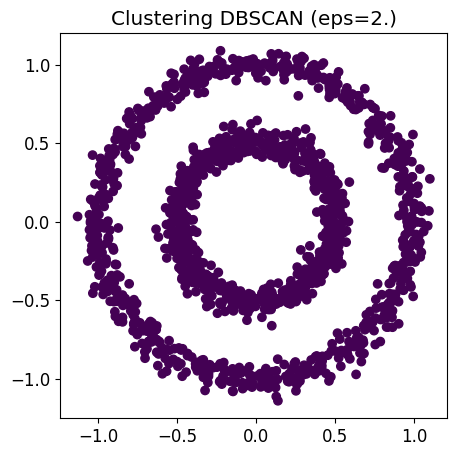

In [37]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=dbscan_2.labels_)
plt.title("Clustering DBSCAN (eps=2.)")

#### Trouver eps avec le coefficient de silhouette

In [38]:
print("Coefficient de silhouette pour DBSCAN (eps=0.2) : %.2f" % metrics.silhouette_score(circles_X, dbscan.labels_))

Coefficient de silhouette pour DBSCAN (eps=0.2) : 0.11


In [39]:
eps_values = np.logspace(-3, 1, 40)
silhouettes = []

for eps in eps_values:
    dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
    dbscan_eps.fit(circles_X)
    if len(unique(dbscan_eps.labels_)) > 1: # nécessaire pour calculer le coeff de silhouette
        silhouettes.append(metrics.silhouette_score(circles_X, dbscan_eps.labels_))
    else:
        silhouettes.append(-1)

Text(0, 0.5, 'silhouette')

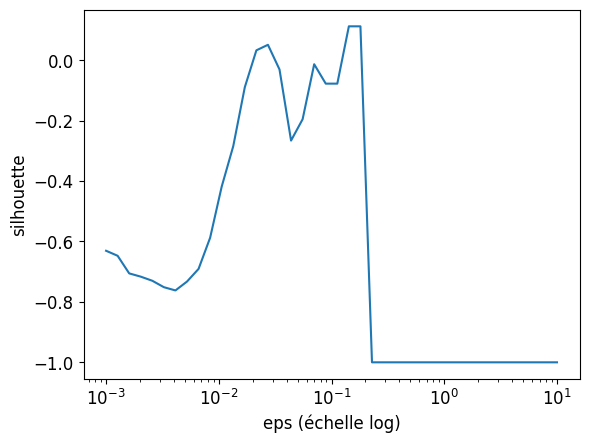

In [40]:
plt.plot(eps_values, silhouettes)
plt.xscale("log")
plt.xlabel("eps (échelle log)")
plt.ylabel("silhouette")

In [41]:
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
print("Eps correspondant : %.2f" % eps_values[silhouettes.index(best_silhouette)])

Coefficient de silhouette optimal : 0.11
Eps correspondant : 0.14


### Index de Rand ajusté

L'index de Rand ajusté permet de **comparer un résultat de clustering avec des étiquettes**. Pour chaque paire d'observations nous regardons si elles se situent dans le même cluster ou non, dans le clustering prédit et réel. L'index prend des valeurs entre 0 (clustering aléatoire) et 1 (clustering parfait).

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

__Question :__ Pourquoi ne pas utiliser une métrique d'évaluation de modèle de classification ici ?

In [42]:
print("Index de Rand ajusté du K-means (K=2) : %.2f" % metrics.adjusted_rand_score(circles_labels, kmeans.labels_))

Index de Rand ajusté du K-means (K=2) : -0.00


In [43]:
print("Index de Rand ajusté de dbscan (eps=0.2) : %.2f" % metrics.adjusted_rand_score(circles_labels, dbscan.labels_))

Index de Rand ajusté de dbscan (eps=0.2) : 1.00


## 2. Manchots

On reprend ici les données utilisées dans le notebook 4

In [44]:
palmerpenguins = pd.read_csv("data/penguins_data.csv")

__Alternativement :__ Si vous avez besoin de télécharger le fichier (par exemple sur colab) :

In [ ]:
!wget https://raw.githubusercontent.com/chagaz/cp-ia-intro-ml-2022/main/4-SVM/data/penguins_data.csv

palmerpenguins = pd.read_csv("penguins_data.csv")

In [45]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()

In [46]:
penguins_X = np.array(palmerpenguins[["bill_length_mm", "body_mass_g"]])

In [47]:
from sklearn import preprocessing

In [48]:
# standardisation (centrer-réduire)
penguins_X = preprocessing.StandardScaler().fit_transform(penguins_X)

In [49]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
penguins_labels = species_int

Text(0, 0.5, 'body_mass_g (centrée-réduite)')

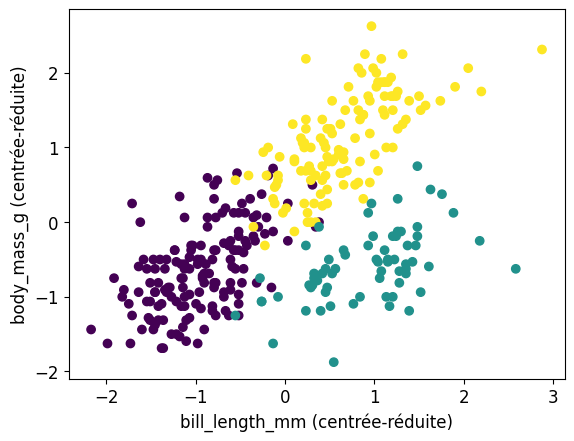

In [50]:
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels)
plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

### KMeans

In [51]:
# initialisation d'un k-means avec k=3
kmeans = cluster.KMeans(n_clusters=3)

# application aux données 
kmeans.fit(penguins_X)

/Users/gguichaoua/opt/anaconda3/envs/conplex-dti/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

Text(0, 0.5, 'body_mass_g (centrée-réduite)')

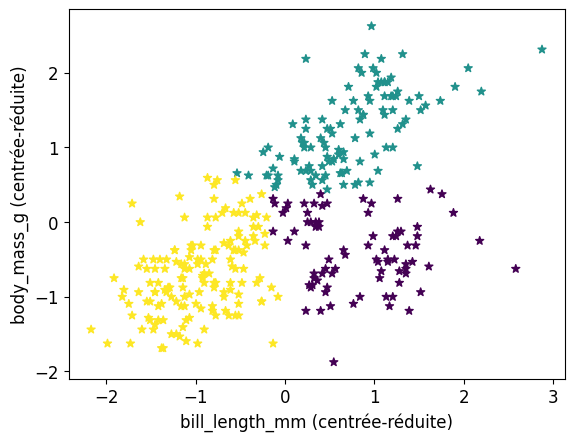

In [52]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=kmeans.labels_, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

In [53]:
print("Coefficient de silhouette pour le k-means (k=3) : %.2f" % metrics.silhouette_score(penguins_X, kmeans.labels_))

Coefficient de silhouette pour le k-means (k=3) : 0.47


In [54]:
print("Index de Rand ajusté du K-means (K=3) : %.2f" % metrics.adjusted_rand_score(penguins_labels, kmeans.labels_))

Index de Rand ajusté du K-means (K=3) : 0.75


### DBSCAN

In [55]:
eps_values = np.logspace(-3, 1, 40)
silhouettes = []

for eps in eps_values:
    dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
    dbscan_eps.fit(penguins_X)
    if len(unique(dbscan_eps.labels_)) > 1: # nécessaire pour calculer le coeff de silhouette
        silhouettes.append(metrics.silhouette_score(penguins_X, dbscan_eps.labels_))
    else:
        silhouettes.append(-1)

Text(0, 0.5, 'silhouette')

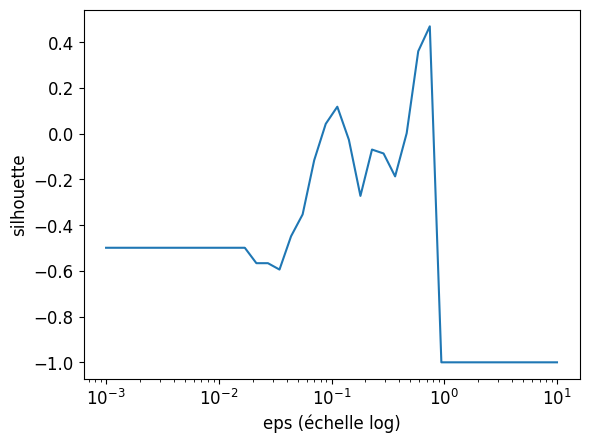

In [56]:
plt.plot(eps_values, silhouettes)
plt.xscale("log")
plt.xlabel("eps (échelle log)")
plt.ylabel("silhouette")

In [57]:
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
best_eps = eps_values[silhouettes.index(best_silhouette)]
print("Eps correspondant : %.2f" % best_eps)

Coefficient de silhouette optimal : 0.47
Eps correspondant : 0.74


In [58]:
dbscan_opt = cluster.DBSCAN(eps=best_eps, min_samples=2)
dbscan_opt.fit(penguins_X)

DBSCAN(eps=0.7443803013251689, min_samples=2)

In [59]:
np.unique(dbscan_opt.labels_)

array([-1,  0])

In [60]:
print("Index de Rand ajusté de DBSCAN : %.2f" % metrics.adjusted_rand_score(penguins_labels, dbscan_opt.labels_))

Index de Rand ajusté de DBSCAN : 0.00


Text(0, 0.5, 'body_mass_g (centrée-réduite)')

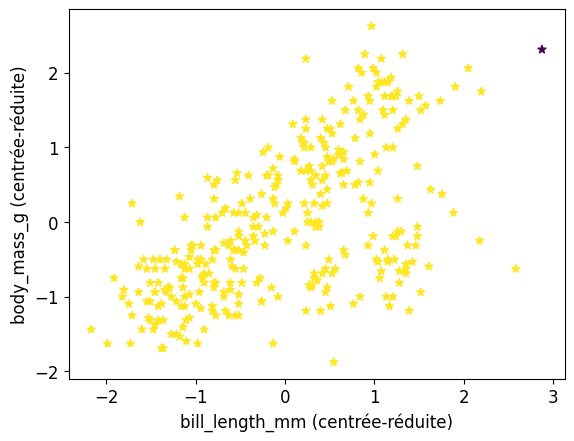

In [61]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=dbscan_opt.labels_, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

### Modèle de mélange gaussien 

Le modèle de mélange de gaussiennes cherche à **optimiser les paramètres d'un nombre fini de gaussiennes** aux données. 

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [62]:
from sklearn import mixture

In [63]:
# initialisation d'un k-means avec k=3
gmm = mixture.GaussianMixture(n_components=3)

# application aux données 
gmm.fit(penguins_X)

# prédiction des clusters
gmm_labels = gmm.predict(penguins_X)

Text(0, 0.5, 'body_mass_g (centrée-réduite)')

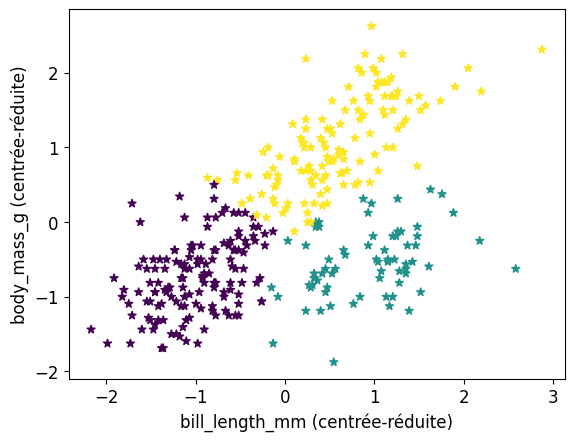

In [64]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=gmm_labels, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

In [65]:
print("Coefficient de silhouette pour le GMM (k=3) : %.2f" % metrics.silhouette_score(penguins_X, gmm_labels))

Coefficient de silhouette pour le GMM (k=3) : 0.47


In [66]:
print("Index de Rand ajusté du GMM (K=3) : %.2f" % metrics.adjusted_rand_score(penguins_labels, gmm_labels))

Index de Rand ajusté du GMM (K=3) : 0.79


### Clustering hiérarchique et dendogramme

Le clustering hiérarchique est une famille générale d'algorithmes de clustering qui construisent des clusters imbriqués en les fusionnant ou en les divisant successivement. Cette hiérarchie de clusters est représentée sous forme d'arbre (ou dendrogramme).

L'objet [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) effectue un clustering hiérarchique en utilisant une approche ascendante : chaque observation commence dans son propre cluster, et les clusters sont successivement fusionnés ensemble.

In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

En dessinant le dendogramme, on peut choisir le nombre de clusters.

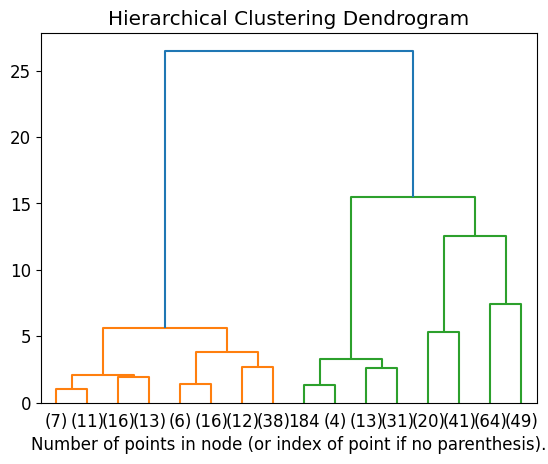

In [71]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(penguins_X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


__Question__ A l'aide du dendogramme, quel nombre de clusters est il raisonnable de choisir ? L'utiliser dans le code suivant.

Text(0, 0.5, 'body_mass_g (centrée-réduite)')

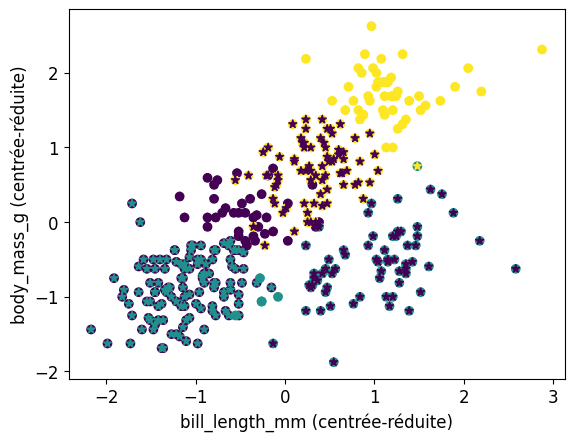

In [ ]:
# plot result of hierarchical clustering
model = AgglomerativeClustering(n_clusters= #TODO 
                                , linkage='ward')

model = model.fit(penguins_X)

#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=model.labels_, marker='*')
plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

